In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [2]:
import tensorflow as tf
import os
from tensorflow.keras import layers
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-03-20 07:07:46.121338: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 07:07:46.121439: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 07:07:46.274847: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
mainDIR = os.listdir('/kaggle/input/chest-xray-pneumonia/')
print(mainDIR)

['chest_xray']


In [4]:
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
validation_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'
test_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [6]:
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [7]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (128, 128))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (128, 128))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [8]:
#Applying a normal CNN
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation ="relu", input_shape=(128,128,3)))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(32, kernel_size = (3,3), activation ="relu"))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(32, activation ="relu"))
model.add(Dense(1, activation ="sigmoid"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       921,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 931,809 (3.55 MB)

 Trainable params: 931,809 (3.55 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"]) 

In [11]:
history = model.fit(train_generator, epochs = 10, verbose= 1, validation_data = validation_generator)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-03-20 07:08:06.646108: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 79387: 5.33878, expected 4.6937
2024-03-20 07:08:06.646199: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 79411: 5.20293, expected 4.55786
2024-03-20 07:08:06.646210: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 79412: 5.14421, expected 4.49914
2024-03-20 07:08:06.646219: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 79423: 5.23559, expected 4.59051
2024-03-20 07:08:06.646228: E external/local_xla/xla/service/gpu/buffer_c

  1/261 ━━━━━━━━━━━━━━━━━━━━ 34:20 8s/step - accuracy: 0.8000 - loss: 0.6647

I0000 00:00:1710918488.745251      90 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


103/261 ━━━━━━━━━━━━━━━━━━━━ 1:02 393ms/step - accuracy: 0.7311 - loss: 0.7195

2024-03-20 07:08:49.686389: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 20279: 3.63212, expected 3.13652
2024-03-20 07:08:49.686503: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30190: 3.63212, expected 3.13652
2024-03-20 07:08:49.686521: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31831: 5.49767, expected 4.81794
2024-03-20 07:08:49.686531: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31929: 5.27093, expected 4.5912
2024-03-20 07:08:49.686540: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31931: 5.73549, expected 5.05576
2024-03-20 07:08:49.686549: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 32093: 5.60186, expected 4.92212
2024-03-20 07:08:49.686558: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 32094: 5.1627, expected 4.48297
2024-03-20 07:08:49.686570: E

261/261 ━━━━━━━━━━━━━━━━━━━━ 110s 394ms/step - accuracy: 0.7422 - loss: 0.6236 - val_accuracy: 0.6250 - val_loss: 0.8420
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 74s 276ms/step - accuracy: 0.8043 - loss: 0.4043 - val_accuracy: 0.6250 - val_loss: 0.7373
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 73s 271ms/step - accuracy: 0.8350 - loss: 0.3653 - val_accuracy: 0.5625 - val_loss: 1.0475
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 72s 270ms/step - accuracy: 0.8435 - loss: 0.3430 - val_accuracy: 0.7500 - val_loss: 0.8121
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 72s 268ms/step - accuracy: 0.8670 - loss: 0.2998 - val_accuracy: 0.6250 - val_loss: 1.3169
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 73s 271ms/step - accuracy: 0.8802 - loss: 0.2752 - val_accuracy: 0.6875 - val_loss: 0.8778
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 72s 270ms/step - accuracy: 0.9010 - loss: 0.2413 - val_accuracy: 0.6875 - val_loss: 0.7631
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 72s 269ms/step - accuracy: 0.8833 - loss: 0.2698 - va

In [12]:
# Lets see Transfer learning ka kamaal
base_model = tf.keras.applications.Xception(
    input_shape=(128,128,3),
    include_top=False,
    weights="imagenet")

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
# Freezing Layers

for layer in base_model.layers[:-5]:
    layer.trainable=False

In [14]:
model=Sequential()
model.add(base_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ ?                      │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 3,166,720 (12.08 MB)

 Non-trainable params: 17,694,760 (67.50 MB)

In [16]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"]) 

In [17]:
history = model.fit(train_generator, epochs = 6, verbose= 1, validation_data = validation_generator)

Epoch 1/6
261/261 ━━━━━━━━━━━━━━━━━━━━ 106s 330ms/step - accuracy: 0.8298 - loss: 0.4608 - val_accuracy: 0.7500 - val_loss: 0.5662
Epoch 2/6
261/261 ━━━━━━━━━━━━━━━━━━━━ 73s 274ms/step - accuracy: 0.9127 - loss: 0.2190 - val_accuracy: 0.6875 - val_loss: 0.5144
Epoch 3/6
261/261 ━━━━━━━━━━━━━━━━━━━━ 73s 273ms/step - accuracy: 0.9339 - loss: 0.1869 - val_accuracy: 0.8750 - val_loss: 0.3003
Epoch 4/6
261/261 ━━━━━━━━━━━━━━━━━━━━ 73s 273ms/step - accuracy: 0.9311 - loss: 0.2019 - val_accuracy: 0.8125 - val_loss: 0.3764
Epoch 5/6
261/261 ━━━━━━━━━━━━━━━━━━━━ 74s 274ms/step - accuracy: 0.9274 - loss: 0.1923 - val_accuracy: 0.8125 - val_loss: 0.3733
Epoch 6/6
261/261 ━━━━━━━━━━━━━━━━━━━━ 74s 276ms/step - accuracy: 0.9366 - loss: 0.1706 - val_accuracy: 0.8125 - val_loss: 0.3750


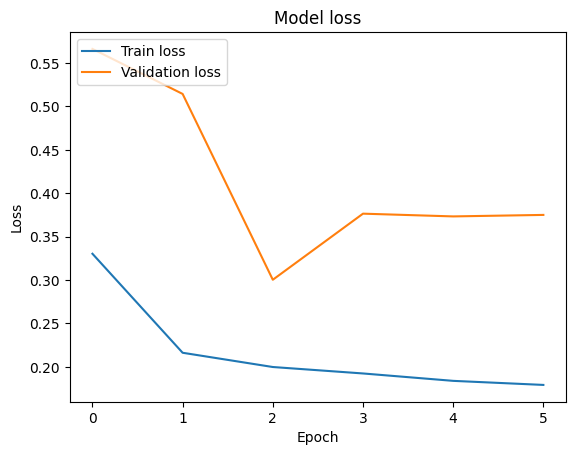

In [18]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()


In [19]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input

# Path to your image
image_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0009-0001.jpeg'

# Load the image with a target size of 128x128
img = image.load_img(image_path, target_size=(128, 128))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Preprocess the image for the Xception model
img_array = preprocess_input(img_array)

# Expand the dimensions to match what the model expects
img_array = np.expand_dims(img_array, axis=0)

# Make a prediction
prediction = model.predict(img_array)

# Assuming your model's final layer activation is sigmoid and 1=pneumonia, 0=normal
if prediction[0] > 0.5:
    print("The image is predicted to indicate pneumonia.")
else:
    print("The image is predicted to be normal.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
The image is predicted to be normal.


In [20]:
#Credits: Ayush Gaur Sir